# Surprise Housing

problem description

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.

The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:

• Which variables are important to predict the price of variable?

• How do these variables describe the price of the house?

Business Goal:

You are required to model the price of houses with the available independent variables. This model will then be used 
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the 
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the 
management to understand the pricing dynamics of a new market

# Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")

In [4]:
train = pd.read_csv(r"C:\Users\USER\AppData\Local\Temp\Temp5_Project-Housing--2-.zip\Project-Housing_splitted\train.csv")
test = pd.read_csv(r"C:\Users\USER\AppData\Local\Temp\Temp5_Project-Housing--2-.zip\Project-Housing_splitted\test.csv")
train["source"] = "Train"
test["source"] = "Test"
data = pd.concat([train,test],ignore_index = True)
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2007,WD,Normal,128000.0,Train
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,10,2007,WD,Normal,268000.0,Train
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2007,WD,Normal,269790.0,Train
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000.0,Train
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2009,WD,Normal,215000.0,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,10,2008,WD,Normal,NaN,Test
1456,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,NaN,Test
1457,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Shed,700,3,2010,WD,Normal,NaN,Test
1458,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,10,2006,WD,Normal,NaN,Test


In [5]:
data.shape

(1460, 82)

In [6]:
pd.set_option("display.max_rows",None)
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [7]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


<AxesSubplot:>

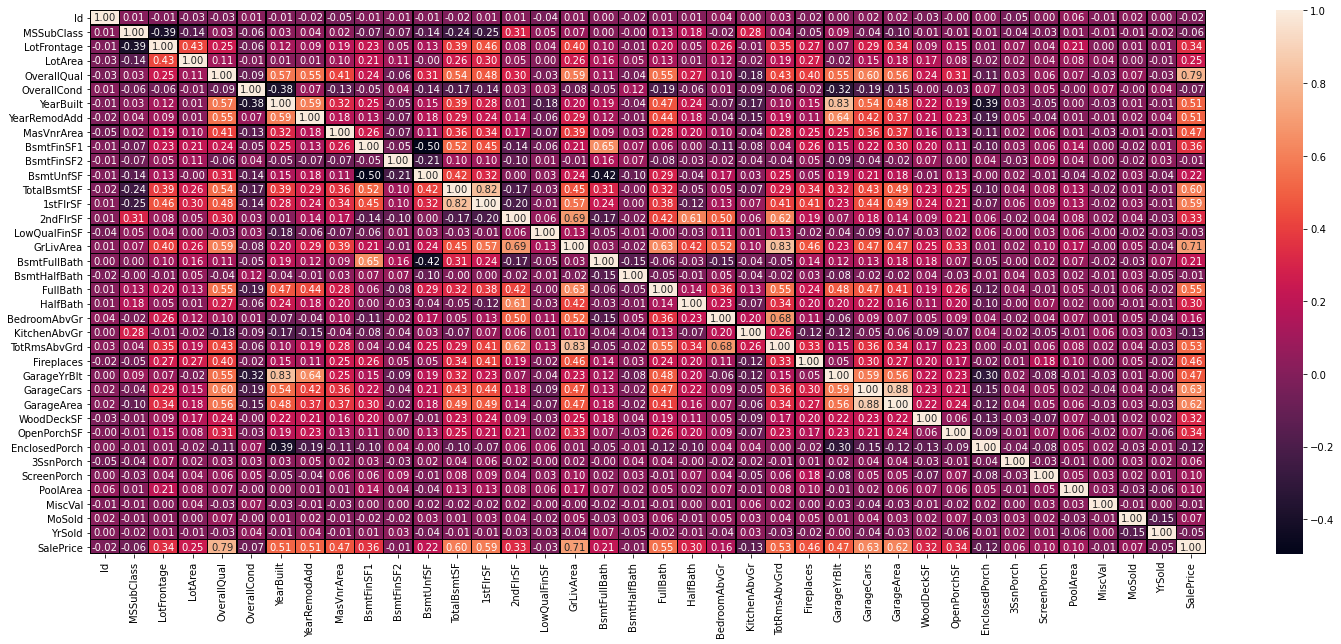

In [8]:
plt.figure(figsize=(25,10))
sns.heatmap(data.corr(),annot=True,linewidths = 0.5,linecolor="black",fmt = '.2f')

Highly correlated features :
    
1 . TotalBsmtSF and 1stFlrSF

2 . GarageCars and GarageArea

Negatively correlated with target('saleprice'):
    
1.Id

2.MSSubclass

3.OverallCond



In [9]:
for col in data.columns:
    if data[col].dtype=='object':
        print("column name is:{} and number of district values:{}".format(col,len(data[col].value_counts())))

column name is:MSZoning and number of district values:5
column name is:Street and number of district values:2
column name is:Alley and number of district values:2
column name is:LotShape and number of district values:4
column name is:LandContour and number of district values:4
column name is:Utilities and number of district values:2
column name is:LotConfig and number of district values:5
column name is:LandSlope and number of district values:3
column name is:Neighborhood and number of district values:25
column name is:Condition1 and number of district values:9
column name is:Condition2 and number of district values:8
column name is:BldgType and number of district values:5
column name is:HouseStyle and number of district values:8
column name is:RoofStyle and number of district values:6
column name is:RoofMatl and number of district values:8
column name is:Exterior1st and number of district values:15
column name is:Exterior2nd and number of district values:16
column name is:MasVnrType a

In [10]:
for col in data.columns:
    if data[col].dtype=="object":
        print(data[col].value_counts())
        print()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Pave    1454
Grvl       6
Name: Street, dtype: int64

Grvl    50
Pave    41
Name: Alley, dtype: int64

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood

In [11]:
# make two classification as regular and irregular in column LOtShape(General shape of property)
data["LotShape"].replace("IR1","IR3",inplace=True)
data["LotShape"].replace("IR2","IR3",inplace=True)

In [12]:
# make replace C(all) to Commercial(C) in column MSZoning(Identifies the general zoning classification of the sale)
data["MSZoning"].replace("C (all)","C",inplace=True)

In [13]:
# make replace HouseStyle column attributes
data["HouseStyle"].replace("1Story","One story",inplace=True)
data["HouseStyle"].replace("2Story","Two story",inplace=True)
data["HouseStyle"].replace("1.5Fin","one and half fin",inplace=True)
data["HouseStyle"].replace("1.5Unf","one and half unf",inplace=True)
data["HouseStyle"].replace("2.5Fin","two and half fin",inplace=True)
data["HouseStyle"].replace("2.5Unf","two and half unf",inplace=True)

In [14]:
# functional
data["Functional"].replace("Min2","Min1",inplace=True)
data["Functional"].replace("Maj2","Maj1",inplace=True)


# Filling NaN values

In [15]:
data["MiscFeature"].fillna("None",inplace=True)

In [16]:
data["Fence"].fillna("No Fence",inplace=True)

In [17]:
data["PoolQC"].fillna("No Pool",inplace=True)

In [18]:
data["Alley"].fillna("No alley",inplace=True)

In [19]:
data["BsmtQual"].fillna("No Basment",inplace=True)

In [20]:
data["BsmtCond"].fillna("No Basment",inplace=True)

In [21]:
data["BsmtExposure"].fillna("No Basment",inplace=True)

In [22]:
data["BsmtFinType1"].fillna("No Basment",inplace=True)

In [23]:
data["BsmtFinType2"].fillna("No Basment",inplace=True)

In [24]:
data["FireplaceQu"].fillna("No Fireplace",inplace=True)

In [25]:
data["GarageQual"].fillna("No Garage",inplace=True)
data["GarageYrBlt"].fillna(0,inplace=True)
data["GarageFinish"].fillna("No Garage",inplace=True)
data["GarageType"].fillna("No Garage",inplace=True)
data["GarageCond"].fillna("No Garage",inplace=True)

In [26]:
# GarageCars and GarageArea, Totalbsmtsf and 1stFlrSF both are equally correlated with each other so dropm one column from each
data = data.drop(columns=["GarageCars","1stFlrSF"],axis=1)

In [27]:
data[data["Electrical"].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source
1271,1380,80,RL,73.0,9735,Pave,No alley,Reg,Lvl,AllPub,...,No Pool,No Fence,None,0,5,2008,WD,Normal,NaN,Test


In [28]:
data["Electrical"].fillna("SBrkr",inplace=True)

In [29]:
data["MasVnrArea"].fillna(data["MasVnrArea"].mean(),inplace=True)

In [30]:
# functions for solving categorical column missing value
def imput_nan_category(DataFrame,ColName):
    most_frequent_category=DataFrame[ColName].mode()[0]  # .mode()[0]--->first category name
    DataFrame[ColName + "_Imputed"] = DataFrame[ColName] # replace nan values with most occured category
    DataFrame[ColName + "_Imputed"].fillna(most_frequent_category,inplace=True)

In [31]:
# allpying the function
for columns in ["MasVnrType"]:
    imput_nan_category(data,columns)
    
data=data.drop('MasVnrType',axis=1)

In [32]:
data["LotFrontage"].fillna(data["LotFrontage"].mean(),inplace= True)

In [33]:
data.isnull().sum()

Id                      0
MSSubClass              0
MSZoning                0
LotFrontage             0
LotArea                 0
Street                  0
Alley                   0
LotShape                0
LandContour             0
Utilities               0
LotConfig               0
LandSlope               0
Neighborhood            0
Condition1              0
Condition2              0
BldgType                0
HouseStyle              0
OverallQual             0
OverallCond             0
YearBuilt               0
YearRemodAdd            0
RoofStyle               0
RoofMatl                0
Exterior1st             0
Exterior2nd             0
MasVnrArea              0
ExterQual               0
ExterCond               0
Foundation              0
BsmtQual                0
BsmtCond                0
BsmtExposure            0
BsmtFinType1            0
BsmtFinSF1              0
BsmtFinType2            0
BsmtFinSF2              0
BsmtUnfSF               0
TotalBsmtSF             0
Heating     

All the nan values are filled except target column

<AxesSubplot:xlabel='MSZoning', ylabel='MSSubClass'>

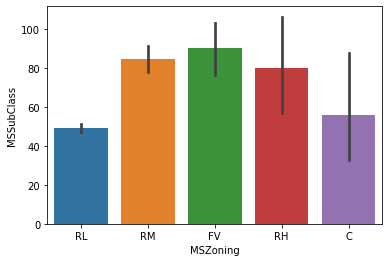

In [34]:
sns.barplot(y="MSSubClass",x="MSZoning",data=data)

Floating village residential is more involved in sale

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

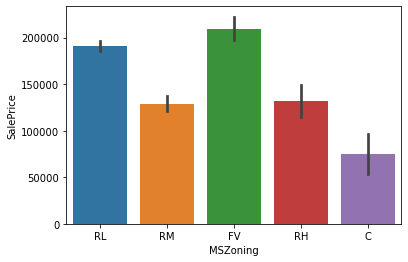

In [35]:
sns.barplot(y="SalePrice",x= "MSZoning",data=data)

highest price also charged for floating village and lowest price for commercial

<AxesSubplot:xlabel='Street', ylabel='SalePrice'>

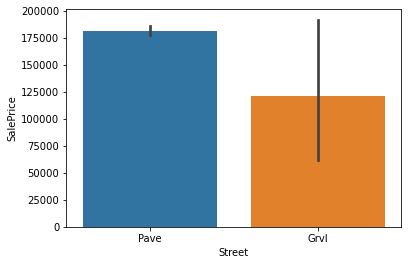

In [36]:
sns.barplot(y="SalePrice",x= "Street",data=data)

most valued property has paved road for accessing to property

<AxesSubplot:xlabel='Alley', ylabel='count'>

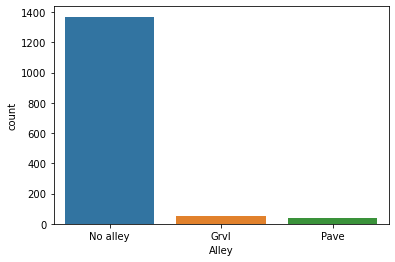

In [37]:
sns.countplot(x="Alley",data=data)

Majority of property has no alley for accesing the property

<AxesSubplot:xlabel='LotShape', ylabel='count'>

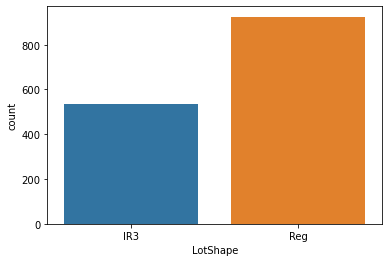

In [38]:
sns.countplot(x="LotShape",data=data)

majority of property in regular shape

<AxesSubplot:xlabel='LandContour', ylabel='count'>

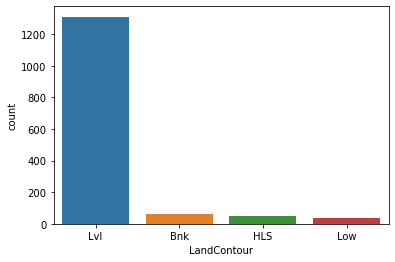

In [39]:
sns.countplot(x="LandContour",data=data)

mostly high number of or majority propert in flat lavel

<AxesSubplot:xlabel='Utilities', ylabel='count'>

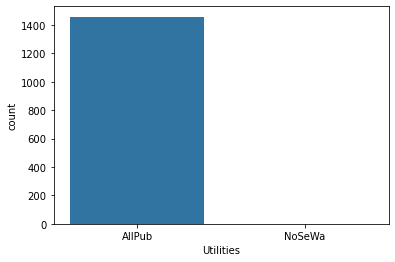

In [40]:
sns.countplot(x= "Utilities",data=data)

All houses has available public utilities like Electricity, Gas, and Water (Septic Tank) except one house

[Text(0, 0, 'NPkVill'),
 Text(1, 0, 'NAmes'),
 Text(2, 0, 'NoRidge'),
 Text(3, 0, 'NWAmes'),
 Text(4, 0, 'Gilbert'),
 Text(5, 0, 'Sawyer'),
 Text(6, 0, 'Edwards'),
 Text(7, 0, 'IDOTRR'),
 Text(8, 0, 'CollgCr'),
 Text(9, 0, 'Mitchel'),
 Text(10, 0, 'Crawfor'),
 Text(11, 0, 'BrDale'),
 Text(12, 0, 'StoneBr'),
 Text(13, 0, 'BrkSide'),
 Text(14, 0, 'NridgHt'),
 Text(15, 0, 'OldTown'),
 Text(16, 0, 'Somerst'),
 Text(17, 0, 'Timber'),
 Text(18, 0, 'SWISU'),
 Text(19, 0, 'SawyerW'),
 Text(20, 0, 'ClearCr'),
 Text(21, 0, 'Veenker'),
 Text(22, 0, 'Blmngtn'),
 Text(23, 0, 'MeadowV'),
 Text(24, 0, 'Blueste')]

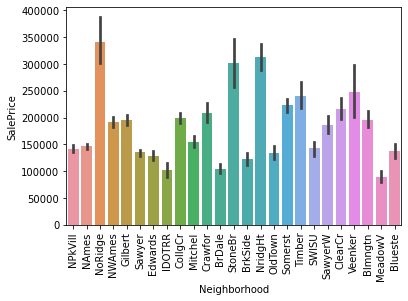

In [41]:
l = list(data['Neighborhood'].unique())
chart = sns.barplot(x="Neighborhood",y="SalePrice",data=data)
chart.set_xticklabels(labels=l, rotation=90)

Highest price charged for NorthRidge and least charge in Meadow Village

<AxesSubplot:xlabel='BldgType', ylabel='count'>

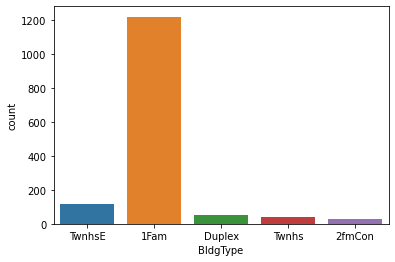

In [42]:
sns.countplot(x="BldgType",data=data)

In the selling property majority of the dwelling is Single-family Detached

<AxesSubplot:xlabel='HouseStyle', ylabel='count'>

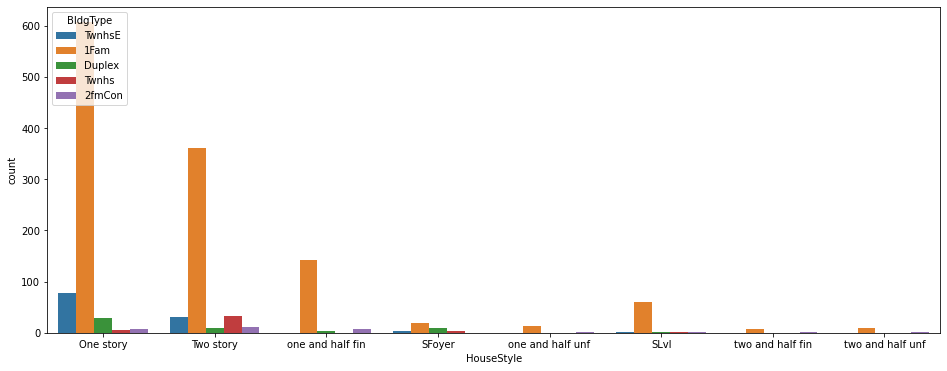

In [43]:
plt.figure(figsize=(16,6))
sns.countplot(hue="BldgType",data=data,x="HouseStyle")

Almost dwelling are finished level

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

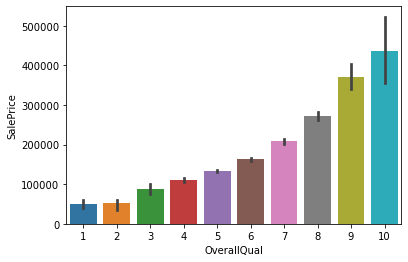

In [44]:
sns.barplot(y="SalePrice",x= "OverallQual",data=data)

Highest price of the dwell are deppend on overall material and finishing of the house . Here can see that very excellent(10) rate is
charged highest price and decreasing the quality or use of material and finishing causes decreasing the price


<AxesSubplot:xlabel='BldgType', ylabel='OverallQual'>

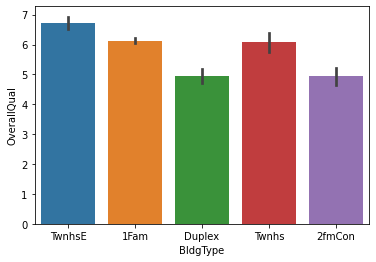

In [45]:
sns.barplot(x="BldgType",y= "OverallQual",data=data)

Here can see that best quality provided in Townhouse End Unit,Single-family Detached and Townhouse Inside Unit

<AxesSubplot:xlabel='OverallCond', ylabel='count'>

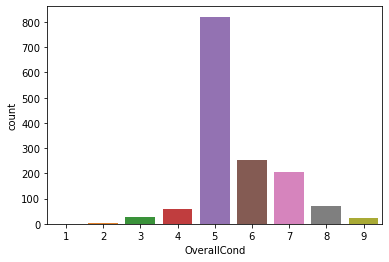

In [46]:
sns.countplot(x= "OverallCond",data=data)

In the above graph can see the graphical representation of rate of overall condition of the house. highest rate is 5 that means 
Average rate

<AxesSubplot:xlabel='CentralAir', ylabel='SalePrice'>

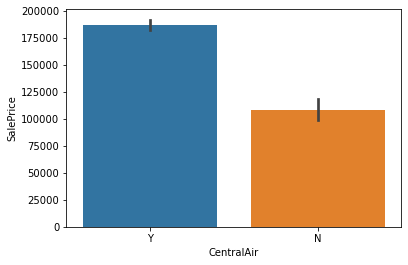

In [47]:
sns.barplot(y="SalePrice",x= "CentralAir",data=data)

Encoding

In [48]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source,MasVnrType_Imputed
0,127,120,RL,70.049958,4928,Pave,No alley,IR3,Lvl,AllPub,...,No Fence,None,0,2,2007,WD,Normal,128000.0,Train,None
1,889,20,RL,95.000000,15865,Pave,No alley,IR3,Lvl,AllPub,...,No Fence,None,0,10,2007,WD,Normal,268000.0,Train,None
2,793,60,RL,92.000000,9920,Pave,No alley,IR3,Lvl,AllPub,...,No Fence,None,0,6,2007,WD,Normal,269790.0,Train,None
3,110,20,RL,105.000000,11751,Pave,No alley,IR3,Lvl,AllPub,...,MnPrv,None,0,1,2010,COD,Normal,190000.0,Train,BrkFace
4,422,20,RL,70.049958,16635,Pave,No alley,IR3,Lvl,AllPub,...,No Fence,None,0,6,2009,WD,Normal,215000.0,Train,Stone
5,1197,60,RL,58.000000,14054,Pave,No alley,IR3,Lvl,AllPub,...,No Fence,None,0,11,2006,New,Partial,219210.0,Train,None
6,561,20,RL,70.049958,11341,Pave,No alley,IR3,Lvl,AllPub,...,No Fence,None,0,5,2010,WD,Normal,121500.0,Train,BrkFace
7,1041,20,RL,88.000000,13125,Pave,No alley,Reg,Lvl,AllPub,...,GdPrv,None,0,1,2006,WD,Normal,155000.0,Train,BrkCmn
8,503,20,RL,70.000000,9170,Pave,No alley,Reg,Lvl,AllPub,...,GdPrv,Shed,400,4,2007,WD,Normal,140000.0,Train,None
9,576,50,RL,80.000000,8480,Pave,No alley,Reg,Lvl,AllPub,...,No Fence,None,0,10,2008,COD,Abnorml,118500.0,Train,None


In [49]:
housing_data = pd.get_dummies(data,columns=["MSZoning","Street","Alley","LotShape","LandContour","Utilities","LotConfig","LandSlope",
                                           "BldgType","HouseStyle","RoofStyle","RoofMatl","MasVnrType_Imputed","ExterQual","ExterCond",
                                           "Foundation","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","Heating",
                                           "HeatingQC","CentralAir","Electrical","KitchenQual","Functional","FireplaceQu","GarageType",
                                           "GarageFinish","GarageQual","GarageCond","PavedDrive","PoolQC","Fence","MiscFeature","SaleType",
                                           "SaleCondition"])

In [50]:
label = LabelEncoder()
column = ["Neighborhood","Condition1","Condition2","Exterior1st","Exterior2nd"]
for col in column:
    housing_data[col]= label.fit_transform(housing_data[col])

In [51]:
housing_data

,Id,MSSubClass,LotFrontage,LotArea,Neighborhood,Condition1,Condition2,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,127,120,70.049958,4928,13,2,2,6,5,1976,...,0,0,0,1,0,0,0,0,1,0
1,889,20,95.000000,15865,12,2,2,8,6,1970,...,0,0,0,1,0,0,0,0,1,0
2,793,60,92.000000,9920,15,2,2,7,5,1996,...,0,0,0,1,0,0,0,0,1,0
3,110,20,105.000000,11751,14,2,2,6,6,1977,...,0,0,0,0,0,0,0,0,1,0
4,422,20,70.049958,16635,14,2,2,6,7,1977,...,0,0,0,1,0,0,0,0,1,0
5,1197,60,58.000000,14054,8,2,2,7,5,2006,...,0,1,0,0,0,0,0,0,0,1
6,561,20,70.049958,11341,19,2,2,5,6,1957,...,0,0,0,1,0,0,0,0,1,0
7,1041,20,88.000000,13125,19,2,2,5,4,1957,...,0,0,0,1,0,0,0,0,1,0
8,503,20,70.000000,9170,7,1,2,5,7,1965,...,0,0,0,1,0,0,0,0,1,0
9,576,50,80.000000,8480,12,2,2,5,5,1947,...,0,0,0,0,1,0,0,0,0,0


In [52]:
housing_data = housing_data.drop("Id",axis=1)

In [53]:
housing_data.shape

(1460, 230)

In [54]:
# Lets split train and test
df_train=housing_data.loc[housing_data["source"]=="Train"]
df_test=housing_data.loc[housing_data["source"]=="Test"]
df_test.reset_index(drop=True,inplace=True)
print(df_train.columns)
print(df_test.columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Neighborhood', 'Condition1',
       'Condition2', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=230)
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Neighborhood', 'Condition1',
       'Condition2', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=230)


In [55]:
#Lets drop the SalaPrice from test dataset as that is the o/p variable that needs to be predicted
df_test.drop(columns=["SalePrice"],inplace=True)

In [56]:
#lets drop source column from df_train and df_test
df_train.drop(columns=["source"],inplace=True)
df_test.drop(columns=["source"],inplace=True)

In [57]:
# seperate input and output from train
df_x=df_train.drop(columns=["SalePrice"])
y=df_train[["SalePrice"]]

In [58]:
sc = StandardScaler()
x = sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [59]:
def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [60]:
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",c_scores.mean())
    print("standard deviation in r2 score for regressor: ",c_scores.std())
    print(c_scores)

In [61]:
pca = PCA(n_components=23)
x_pca=pca.fit_transform(x)
print("vraiance :{}".format(np.sum(pca.explained_variance_ratio_)))

vraiance :0.42752193595780474


In [62]:
# DecisionTree
dtr=DecisionTreeRegressor()
r_state=maxr2_score(dtr,x_pca,y)

r2 score corresponding to  42  is  0.4096057704578585
r2 score corresponding to  43  is  0.6479176379066629
r2 score corresponding to  44  is  0.7614915800631823
r2 score corresponding to  45  is  0.7168439412650366
r2 score corresponding to  46  is  0.676102318002119
r2 score corresponding to  47  is  0.6279034699952999
r2 score corresponding to  48  is  0.7604982468044391
r2 score corresponding to  49  is  0.7039140354921056
r2 score corresponding to  50  is  0.5987761975001522
r2 score corresponding to  51  is  0.7232814249671901
r2 score corresponding to  52  is  0.6237353779179493
r2 score corresponding to  53  is  0.5763211409577058
r2 score corresponding to  54  is  0.7665263874918373
r2 score corresponding to  55  is  0.7391903858261664
r2 score corresponding to  56  is  0.6537546529815794
r2 score corresponding to  57  is  0.464999780062445
r2 score corresponding to  58  is  0.6874567684009619
r2 score corresponding to  59  is  0.5625435125475964
r2 score corresponding to  60 

In [63]:
# RandomForest
rfr=RandomForestRegressor()
parameters = {"n_estimators":[10,100,500]}
clf = GridSearchCV(rfr, parameters, cv=5,scoring="r2")
clf.fit(x_pca,y)
clf.best_params_

{'n_estimators': 500}

In [64]:
rfr=RandomForestRegressor(n_estimators=500)
r_state=maxr2_score(rfr,x_pca,y)

r2 score corresponding to  42  is  0.7499350495343557
r2 score corresponding to  43  is  0.798740413210415
r2 score corresponding to  44  is  0.8123046959924115
r2 score corresponding to  45  is  0.7642297795448317
r2 score corresponding to  46  is  0.8136308334508355
r2 score corresponding to  47  is  0.852045728045236
r2 score corresponding to  48  is  0.8408879458322959
r2 score corresponding to  49  is  0.8699888628641522
r2 score corresponding to  50  is  0.818667957195527
r2 score corresponding to  51  is  0.8814807162432743
r2 score corresponding to  52  is  0.8467688781299638
r2 score corresponding to  53  is  0.8268962460604475
r2 score corresponding to  54  is  0.8579913309316729
r2 score corresponding to  55  is  0.8270733949560329
r2 score corresponding to  56  is  0.8211799359914309
r2 score corresponding to  57  is  0.8087246995847708
r2 score corresponding to  58  is  0.8683819041975631
r2 score corresponding to  59  is  0.7585688262337258
r2 score corresponding to  60  

In [65]:
# kNeighbour
knr=KNeighborsRegressor()
parameters = {"n_neighbors":range(2,30)}
clf = GridSearchCV(knr, parameters, cv=5,scoring="r2")
clf.fit(x_pca, y)
clf.best_params_

{'n_neighbors': 8}

In [66]:
knr=KNeighborsRegressor(n_neighbors=7)
r_state=maxr2_score(knr,x_pca,y)

r2 score corresponding to  42  is  0.6767345307817748
r2 score corresponding to  43  is  0.6635736119470577
r2 score corresponding to  44  is  0.721115020960522
r2 score corresponding to  45  is  0.7421733685988325
r2 score corresponding to  46  is  0.7334595924423493
r2 score corresponding to  47  is  0.7892307839266748
r2 score corresponding to  48  is  0.7595523145929437
r2 score corresponding to  49  is  0.7755730526015748
r2 score corresponding to  50  is  0.8004262940288189
r2 score corresponding to  51  is  0.8039728728684208
r2 score corresponding to  52  is  0.8059103400576684
r2 score corresponding to  53  is  0.7322356912247265
r2 score corresponding to  54  is  0.7815375719286819
r2 score corresponding to  55  is  0.7588836731472576
r2 score corresponding to  56  is  0.7146847021966758
r2 score corresponding to  57  is  0.7251809542356131
r2 score corresponding to  58  is  0.7832283611865088
r2 score corresponding to  59  is  0.6932382864199769
r2 score corresponding to  60

In [67]:
# SVM
svr=SVR()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svr, parameters, cv=5,scoring="r2")
clf.fit(x_pca,y)
clf.best_params_

{'C': 10, 'kernel': 'linear'}

In [68]:
svr=SVR(kernel="linear",C=10)
r_state=maxr2_score(svr,x_pca,y)

r2 score corresponding to  42  is  0.6122818661268932
r2 score corresponding to  43  is  0.6124247180433018
r2 score corresponding to  44  is  0.6122342998647585
r2 score corresponding to  45  is  0.5901250902119277
r2 score corresponding to  46  is  0.640558738362957
r2 score corresponding to  47  is  0.6307017750554544
r2 score corresponding to  48  is  0.6891634451323706
r2 score corresponding to  49  is  0.6814926833586219
r2 score corresponding to  50  is  0.7012102692036446
r2 score corresponding to  51  is  0.6748222178596485
r2 score corresponding to  52  is  0.6955602564255687
r2 score corresponding to  53  is  0.6461614592638787
r2 score corresponding to  54  is  0.6608752305369485
r2 score corresponding to  55  is  0.6788007585860877
r2 score corresponding to  56  is  0.7274842343946979
r2 score corresponding to  57  is  0.6116944788176593
r2 score corresponding to  58  is  0.6924370085529048
r2 score corresponding to  59  is  0.5551085799432419
r2 score corresponding to  60

# cross validation

In [69]:
print("DECISION TREE REGRESSOR\n\n")
model_evaluation(dtr,x_pca,y)

DECISION TREE REGRESSOR


Mean r2 score for regressor:  0.6001001485306807
standard deviation in r2 score for regressor:  0.09410037586572943
[0.57158938 0.56616682 0.45631042 0.71678884 0.68964528]


In [70]:
print("RANDOM FOREST REGRESSOR\n\n")
model_evaluation(rfr,x_pca,y)

RANDOM FOREST REGRESSOR


Mean r2 score for regressor:  0.8024209436318095
standard deviation in r2 score for regressor:  0.06458832540015058
[0.80970743 0.77836506 0.69490342 0.88627665 0.84285216]


In [71]:
print("KNN REGRESSOR\n\n")
model_evaluation(knr,x_pca,y)

KNN REGRESSOR


Mean r2 score for regressor:  0.7384137050342521
standard deviation in r2 score for regressor:  0.030393437566497164
[0.70684729 0.75338123 0.70208186 0.78328431 0.74647383]


In [72]:
print("SVM REGRESSOR\n\n")
model_evaluation(svr,x_pca,y)

SVM REGRESSOR


Mean r2 score for regressor:  0.63815715011508
standard deviation in r2 score for regressor:  0.042005119772770896
[0.62561771 0.61300107 0.5924542  0.64474462 0.71496815]


In [73]:
# KNN and RandomForest are performing better
x_train, x_test, y_train, y_test = train_test_split(x_pca, y,random_state = 70,test_size=0.20)
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  27202.740823854703
r2_score is:  0.8818291589150998


In [74]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y,random_state = 88,test_size=0.20)
knr.fit(x_train,y_train)
y_pred = knr.predict(x_test)
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  32520.57719630577
r2_score is:  0.8286615182843674


In [75]:
#lets transform df_test accoring to pca
x_pca_test=pca.transform(df_test)

In [76]:
sales_pred=rfr.predict(x_pca_test)

In [77]:
#lets make the dataframe for price_pred
sales_pred=pd.DataFrame(sales_pred,columns=["SalePrice"])

In [78]:
sales_pred.head()

,SalePrice
0,463384.992
1,455393.076
2,513913.890
3,477283.228
4,477542.804


conclusion:
    Randomforest regression is the best prediction model.